# Задачи
1. Загрузите датасет `transaction_data.csv`. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

# Описание данных

Имеются следующие данные:

* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute* – сколько минут прошло с начала дня

**Загрузим датасет transaction_data.csv. Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('/Users/pavel/Desktop/karpov/2 МОДУЛЬ PYTHON +/transaction_data.csv')
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [68]:
data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [69]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [70]:
data.dtypes.value_counts()

object    3
Name: count, dtype: int64

**Проверим, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.**

In [71]:
count_trancaction = data.transaction.value_counts().reset_index()
count_trancaction

,transaction,count
0,successfull,3692
1,cancelled,1619
2,error,4


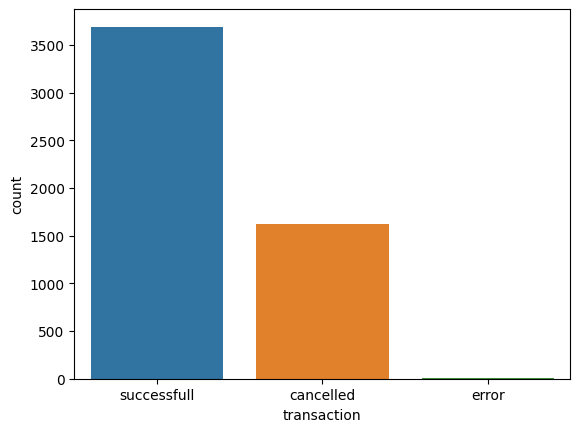

In [72]:
ax = sns.barplot(data = count_trancaction, x = 'transaction', y = 'count')

**Улучшим график:**

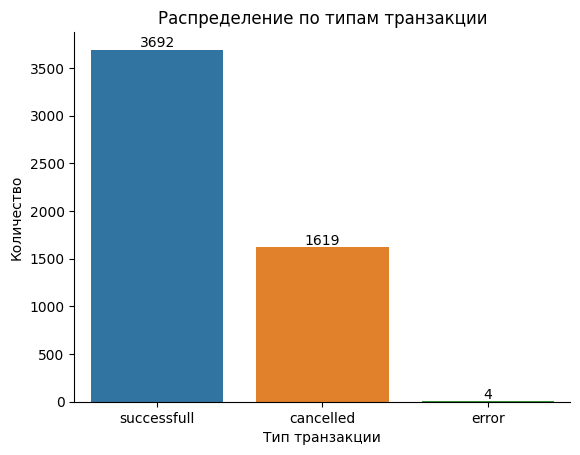

In [73]:
ax = sns.barplot(data = count_trancaction, x = 'transaction', y = 'count')
ax.bar_label(ax.containers[0])
ax.set_title('Распределение по типам транзакции')
ax.set_xlabel('Тип транзакции')
ax.set_ylabel('Количество')
sns.despine()

**Сколько произошло ошибок?**

In [74]:
data.query("transaction == 'error'").transaction.count()

4

**Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull**

**Посмотрим на характеристики распределения, а затем построим гистограмму числа успешных транзакций, совершённых каждым пользователем, где**

* по оси x – число транзакций
* по оси y – доля пользователей с таким числом транзакций

In [75]:
names_transaction =  data.query("transaction == 'successfull'").groupby('name', as_index = False).\
    agg({'transaction' : 'count'})
names_transaction.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [76]:
names_transaction.transaction.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: transaction, dtype: float64

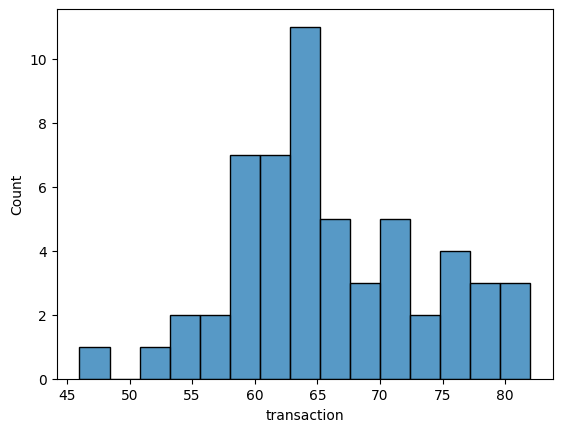

In [77]:
ax = sns.histplot(data = names_transaction, x = 'transaction', bins = 15)

**Построим сводную таблицу user_vs_minute_pivot, где:**

* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

**Пропущенные значения заполним нулями.**

In [110]:
data['date'] = pd.to_datetime(data['date'])
data['minute'] = data.date.dt.minute

In [102]:
user_vs_minute = data.groupby(['name', 'minute'], as_index = False).agg({'transaction' : 'count'})
user_vs_minute

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [106]:
user_vs_minute_pivot = pd.pivot_table(data = user_vs_minute,\
                                        columns = 'name', values = 'transaction', index = 'minute').fillna(0)

In [108]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


**Построим график по сводной таблице**

* по оси x – минута транзакции (сколько минут прошло с начала дня)
* по оси y – число транзакций

In [125]:
minute_trans = user_vs_minute_pivot.sum(axis = 1)
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

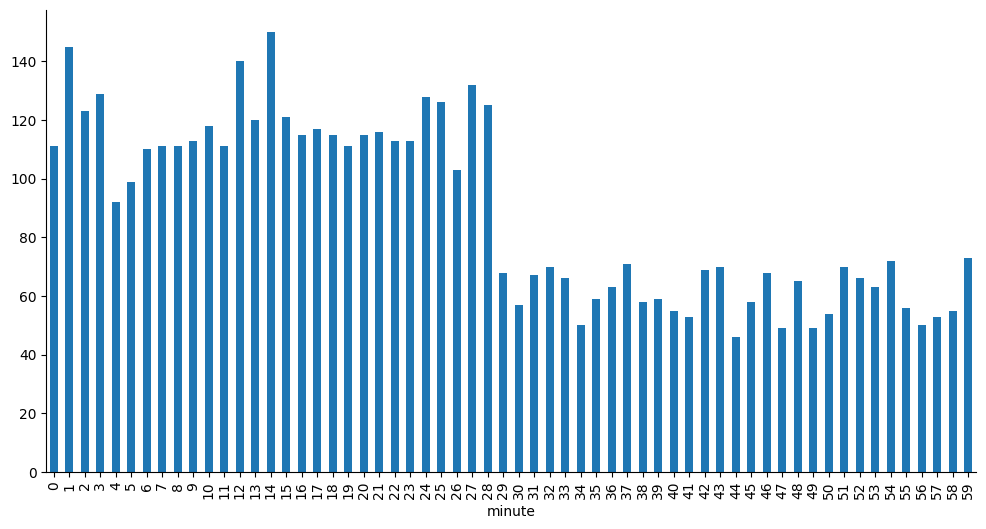

In [131]:
minute_trans.plot.bar(figsize=(12, 6))
sns.despine()

In [135]:
data.date.describe()

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

**Посчитаем число минут, прошедших с начала дня. Результат сохраним в колонку true_minute. Построим график, как в предыдущем шаге, и посмотрим, произошли ли изменения (график в код включать не нужно).**

In [139]:
data['true_minute'] = data.date.dt.minute + data.date.dt.hour * 60
data

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


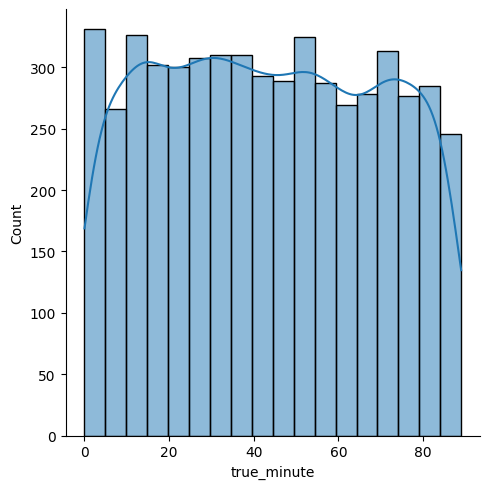

In [142]:
ax = sns.displot(data = data, x = 'true_minute', kde = True)